In [48]:
import pandas as pd

In [49]:
initial_df = pd.read_csv("/Users/raghavan/Downloads/API_ILO_country_YU.csv")

In [50]:
initial_df.columns

Index([u'Country Name', u'Country Code', u'2010', u'2011', u'2012', u'2013',
       u'2014'],
      dtype='object')

In [51]:
initial_df.set_index("Country Code",inplace=True)

In [52]:
initial_df.head()

,Country Name,2010,2011,2012,2013,2014
Country Code,,,,,,
AFG,Afghanistan,20.600000,20.900000,19.700001,21.100000,20.799999
AGO,Angola,10.800000,10.700000,10.700000,10.600000,10.500000
ALB,Albania,25.799999,27.000000,28.299999,28.700001,29.200001
ARB,Arab World,25.022214,28.117516,29.113212,29.335306,29.704569
ARE,United Arab Emirates,9.800000,9.800000,9.800000,9.900000,10.000000


In [53]:
SAARC_COUNTRIES = ["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]

In [54]:
df = initial_df.loc[initial_df["Country Name"].isin(SAARC_COUNTRIES)]

In [55]:
df.drop("Country Name",axis=1)

,2010,2011,2012,2013,2014
Country Code,,,,,
AFG,20.600000,20.9,19.700001,21.1,20.799999
BGD,8.200000,8.2,8.200000,8.9,9.100000
BTN,8.400000,8.4,6.400000,10.4,10.000000
IND,10.200000,10.3,10.700000,10.4,10.400000
LKA,18.799999,16.9,16.600000,18.4,19.100000
MDV,25.400000,25.5,26.600000,26.0,26.900000
NPL,4.000000,4.0,4.000000,4.0,4.000000
PAK,8.200000,8.1,8.100000,8.3,8.600000


In [56]:
import matplotlib.pyplot as plt

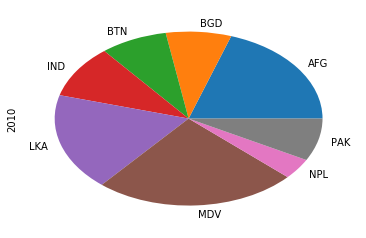

In [57]:
%matplotlib inline
df["2010"].plot(kind="pie")

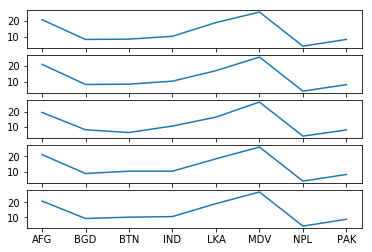

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5, ncols=1)
to_plot = zip(["2010","2011","2012","2013","2014"],ax.tolist())

for p in to_plot:
    p[1].plot(df[p[0]])
    
plt.show()    

In [59]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import numpy as np
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [60]:
%matplotlib inline
years = ["2010","2011","2012","2013","2014"]


trace = go.Scatter(
    y = initial_df["2010"],
    mode = 'markers',
    marker= dict(
        color = initial_df["2010"].values,
        size=initial_df["2010"].values
    ),
    text=initial_df.index
)
data = [trace]
py.iplot(data, filename='basic-scatter')


In [61]:
trace = []
for year in years :
    trace.append(
        go.Box(
        y=initial_df[year],
        name=year,
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8,
        marker=dict(
                size=2,
            ),
        boxmean=True,
        text=initial_df.index)
    )

py.iplot(trace)    

In [80]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import numpy as np
import plotly.graph_objs as go


trace = go.Heatmap(
    z=df[["2010","2011","2012","2013","2014"]].values.tolist(),
    y=[i[0] for i in df[["Country Name"]].values.tolist()],
    x=["2010","2011","2012","2013","2014"]
)
data=[trace]
py.iplot(data, filename='basic-heatmap')